# **Data analysis using PandasAI library**

## First: Connecting to Azure SQL database

### Establishing connection using pyodbc library

In [2]:
import pyodbc

# Connection parameters
server = ''
database = ''
username = ''
password = ''

# Create connection string
conn_str = (
    'DRIVER={SQL Server};'
    f'SERVER={server};'
    f'DATABASE={database};'
    f'UID={username};'
    f'PWD={password}'
)

try:
    # Establish connection
    conn = pyodbc.connect(conn_str)
    print("Successfully connected to database!")
    
except Exception as e:
    print(f"Error connecting to database: {str(e)}")

Successfully connected to database!


### Inseting tables into dataframes

In [4]:
import pandas as pd

# SQL queries to fetch different tables
queries = {
    'properties': 'SELECT * FROM Properties',
    'visits': 'SELECT * FROM Visits',
    'agents': 'SELECT * FROM Agents',
    'clients': 'SELECT * FROM Clients',
    'sales': 'SELECT * FROM Sales'
}

# Dictionary to store dataframes
dfs = {}


try:
    # Fetch each table into a dataframe
    for table_name, query in queries.items():
        dfs[table_name] = pd.read_sql_query(query, conn)
        print(f"Successfully loaded {table_name} table")
        
    # Create individual dataframes for easier access
    properties = dfs['properties']
    visits = dfs['visits'] 
    agents = dfs['agents']
    clients = dfs['clients']
    sales = dfs['sales']
    
except Exception as e:
    print(f"Error fetching data: {str(e)}")


C:\Users\Hp\AppData\Local\Temp\ipykernel_16004\1326421818.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfs[table_name] = pd.read_sql_query(query, conn)


Successfully loaded properties table
Successfully loaded visits table
Successfully loaded agents table
Successfully loaded clients table
Successfully loaded sales table


## Second: Data preprocessing

### Converting dates to datetime

In [5]:
sales['SaleDate'] = pd.to_datetime(sales['SaleDate'])
visits['VisitDate'] = pd.to_datetime(visits['VisitDate'])

### Merging data frames

In [6]:
df = sales.merge(properties, on='PropertyID', how='left')

In [7]:
agent_sales = sales.groupby('AgentID').size().reset_index(name='AgentTotalSales')
df = df.merge(agent_sales, on='AgentID', how='left')

In [8]:
client_purchases = sales.groupby('ClientID').size().reset_index(name='PreviousPurchases')
df = df.merge(client_purchases, on='ClientID', how='left')

In [9]:
df.head()

,SaleID,PropertyID,ClientID,AgentID,SaleDate,SalePrice,PropertyType,Location,Size_sqm,PriceUSD,AgentTotalSales,PreviousPurchases
0,1,891,291,70,2025-02-27,581152,Warehouse,Los Angeles,88,876734,18,1
1,2,886,1354,93,2024-07-12,801724,Retail,Miami,306,185170,28,3
2,3,372,702,43,2024-01-08,828974,Warehouse,New York,115,487971,21,1
3,4,505,1269,19,2024-12-06,1380483,Apartment,Houston,93,961902,17,2
4,5,130,280,63,2025-01-06,159459,Office,Los Angeles,431,160892,23,1


## Third: Started using PandasAI

In [3]:
pip install pandasai>=3.0.0b2

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandasai as pai

sales_data = pai.DataFrame(df)

pai.api_key.set("PAI-e0b88c40-877f-4530-abf9-f9b34f076f2e")

In [21]:
prop_pai = pai.DataFrame(properties)
age_pai = pai.DataFrame(agents)
vis_pai = pai.DataFrame(visits)
cli_pai = pai.DataFrame(clients)

### **Analysis about properties table**

In [17]:
prop_pai.chat("what is the most repeated propertytype in each location?")

DataFrameResponse(type='dataframe', value=      Location PropertyType  Count
0      Chicago       Retail     46
1      Houston    Warehouse     45
2  Los Angeles    Warehouse     46
3        Miami    Apartment     55
4     New York       Office     52)

ChartResponse(type='chart', value='exports\\charts\\temp_chart_0874154c-caea-4f8f-ad39-de79c3a7b59b.png')

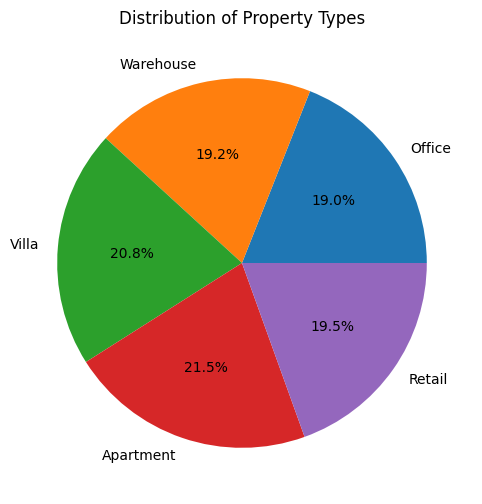

In [19]:
prop_pai.chat("create a pie chart of property types")

### **Analysis about visits table**

ChartResponse(type='chart', value='exports\\charts\\temp_chart_2a01ab9b-9c60-4640-a543-2c86d0f2fa7d.png')

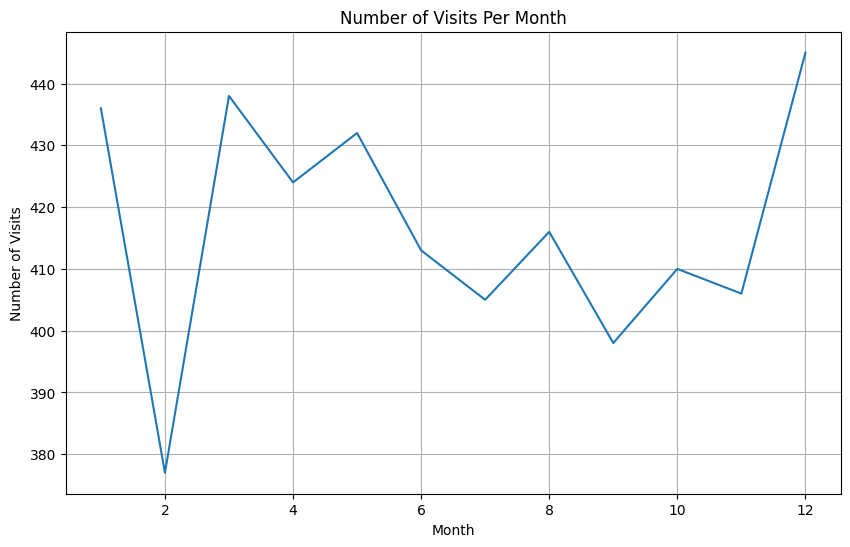

In [27]:
vis_pai.chat("make a visual of number of visits per month")

In [29]:
vis_pai.chat("top 5 clients with the most visits?")

DataFrameResponse(type='dataframe', value=   ClientID  TotalVisits
0      1002           10
1       808            9
2       105            9
3       860            9
4      1171            9)

In [30]:
vis_pai.chat("top 5 agents with the most visits")

DataFrameResponse(type='dataframe', value=   AgentID  TotalVisits
0       15           66
1       23           66
2       40           64
3       93           64
4       92           63)

### **Analysis about the merged datframe of sales**

In [ ]:
df_pai = pai.DataFrame(df)

df_pai.chat("what is the average salePrice for each propertytype?")

DataFrameResponse(type='dataframe', value=  PropertyType   AvgSalePrice
0    Warehouse  800097.667647
1        Villa  762813.474299
2       Retail  766495.681698
3       Office  777720.309859
4    Apartment  750744.238000)

In [25]:
df_pai.chat("who is the client with the highest saleprice in each location?")

DataFrameResponse(type='dataframe', value=      Location  HighestSalePrice  ClientID
0     New York           1499822       702
1        Miami           1499784      1354
2      Houston           1498484      1269
3      Chicago           1497272      1471
4  Los Angeles           1493213       291)